<big><big><big>Лабораторная работа №1. Статистическая обработка одномерной выборки</big></big></big>

**Подключение необходимых библиотек.**

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import statistics as stat

In [7]:
vyborka = list(map(float, """15.29 12.94 6.25 7.93 14.44 4.27 15.8 0.51 16.53 12.53 15.29 13.9 22.37 
9.65 9.96 10.53 12.7 16.74 12.57 6.02 3.41 9.5 12.15 18.06 17.61 18.04 6.98 11.08 19.26 18.33 8.12 
7.06 -2.01 15.35 8.98 23.77 6.32 6.41 13.81 1.98 -0.84 11.27 6.94 17.23 11.76 -2.62 11.75 0.83 14.62 12.84""".split()))
n = len(vyborka)


**Построение вариационного ряда выборки**

*Выборка <big>$(x_1, x_2, ..., x_n)$</big> объёмом <big>$n$</big> из генеральной совокупности <big>$X$</big>, упорядоченная по неубыванию своих элементов, т.е. <big>$x^{(1)} ≤ x^{(2)} ≤ {...} ≤ x^{(n)}$</big>, называется вариационным рядом.*

In [15]:
sorted_vyborka = vyborka.copy()
sorted_vyborka.sort()
print(sorted_vyborka)

[-2.62, -2.01, -0.84, 0.51, 0.83, 1.98, 3.41, 4.27, 6.02, 6.25, 6.32, 6.41, 6.94, 6.98, 7.06, 7.93, 8.12, 8.98, 9.5, 9.65, 9.96, 10.53, 11.08, 11.27, 11.75, 11.76, 12.15, 12.53, 12.57, 12.7, 12.84, 12.94, 13.81, 13.9, 14.44, 14.62, 15.29, 15.29, 15.35, 15.8, 16.53, 16.74, 17.23, 17.61, 18.04, 18.06, 18.33, 19.26, 22.37, 23.77]


**Построение статистического ряда выборки**

*Статистическим рядом выборки <big>$(x_1, x_2, ..., x_n)$</big> называют таблицу, которая в первой строке содержит значения выборки <big>$z_j$</big> (напомним, что <big>$z_1 < z_2 < {...} < z_m$</big> ), во второй строке – частоты <big>$n_j$</big>, а в третьей строке – относительные частоты <big>$\frac{n_j}{n}$</big> этих значений.*

In [8]:
stat_ryad = [[], [], []]
set_vyborka = list(set(vyborka))
set_vyborka.sort()

# получаем список уникальных значений выборки
stat_ryad[0] = set_vyborka

# вычисляем количество появлений в массиве каждого значения выборки
for nj in stat_ryad[0]:
    stat_ryad[1].append(vyborka.count(nj))

# вычисляем относительные частоты
stat_ryad[2] = [i / len(vyborka) for i in stat_ryad[1]]

sp.pprint(sp.Matrix(stat_ryad).T)

⎡-2.62  1  0.02⎤
⎢              ⎥
⎢-2.01  1  0.02⎥
⎢              ⎥
⎢-0.84  1  0.02⎥
⎢              ⎥
⎢0.51   1  0.02⎥
⎢              ⎥
⎢0.83   1  0.02⎥
⎢              ⎥
⎢1.98   1  0.02⎥
⎢              ⎥
⎢3.41   1  0.02⎥
⎢              ⎥
⎢4.27   1  0.02⎥
⎢              ⎥
⎢6.02   1  0.02⎥
⎢              ⎥
⎢6.25   1  0.02⎥
⎢              ⎥
⎢6.32   1  0.02⎥
⎢              ⎥
⎢6.41   1  0.02⎥
⎢              ⎥
⎢6.94   1  0.02⎥
⎢              ⎥
⎢6.98   1  0.02⎥
⎢              ⎥
⎢7.06   1  0.02⎥
⎢              ⎥
⎢7.93   1  0.02⎥
⎢              ⎥
⎢8.12   1  0.02⎥
⎢              ⎥
⎢8.98   1  0.02⎥
⎢              ⎥
⎢ 9.5   1  0.02⎥
⎢              ⎥
⎢9.65   1  0.02⎥
⎢              ⎥
⎢9.96   1  0.02⎥
⎢              ⎥
⎢10.53  1  0.02⎥
⎢              ⎥
⎢11.08  1  0.02⎥
⎢              ⎥
⎢11.27  1  0.02⎥
⎢              ⎥
⎢11.75  1  0.02⎥
⎢              ⎥
⎢11.76  1  0.02⎥
⎢              ⎥
⎢12.15  1  0.02⎥
⎢              ⎥
⎢12.53  1  0.02⎥
⎢              ⎥
⎢12.57  1  0.02⎥
⎢              ⎥
⎢12.7   1  0.0

**Построение гистограммы и полигона частот**

*Разобьём отрезок <big>$[-3; 24]$</big> на 9 равных частей (разрядов) длины <big>$Δ = 3$</big>.*

In [9]:
# делим отрезок [-3; 24] на разряды длины 3
h = [i for i in range(-3, 24 + 1, 3)]

# находим число вхождений элементов в каждый отрезок
ni = []
for i in range(1, len(h)):
    temp = 0
    for j in range(len(vyborka)):
        if h[i - 1] <= vyborka[j] <= h[i]:
            temp += 1
    ni.append(temp)

*Построим гистограмму частот*

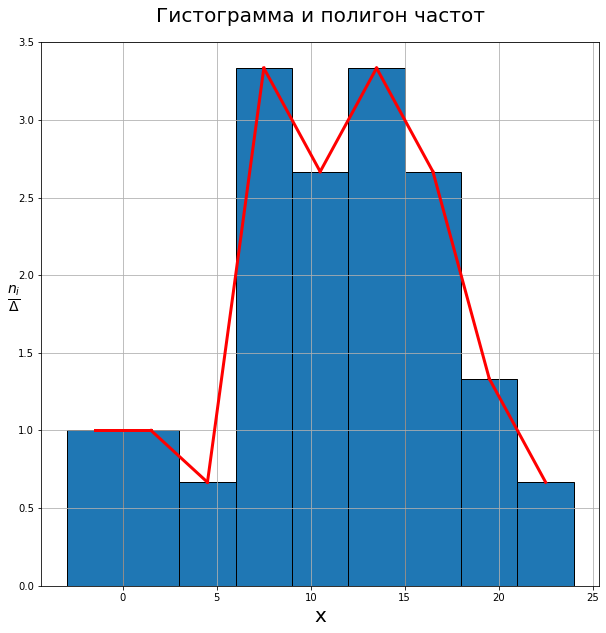

In [338]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

# находим координаты средних точек
mid = []
for i in range(1, len(h)):
    mid.append((h[i] + h[i - 1]) / 2)

# построение гистограммы
plt.bar(mid, [i / 3 for i in ni], width=3, edgecolor="black")

# построение полигона частот
for i in range(1, len(mid)):
    plt.plot([mid[i - 1], mid[i]], [ni[i - 1] / 3, ni[i] / 3], "r", linewidth=3)

# параметры координатной плоскости
ax.set_xlabel("x", fontdict={"fontsize": 20})
ax.set_ylabel(r"$\frac{n_{i}}{\Delta}$", fontdict={"fontsize": 20}, rotation=0)
plt.title("Гистограмма и полигон частот", fontdict={"fontsize": 20}, pad=20)
plt.grid()

plt.show()

**Построение графика эмпирической функции распределения для исходной выборки**

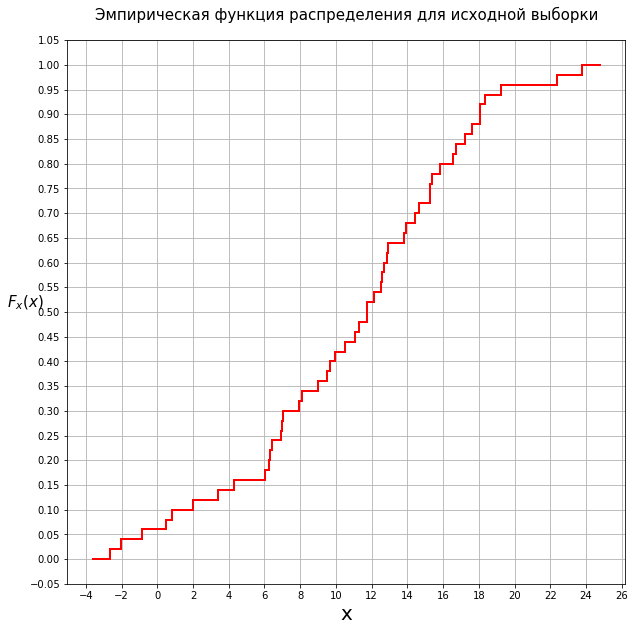

In [339]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

# нахождение накопленной частоты
f = np.cumsum(stat_ryad[1]) / n

# построение функции распределения влево от нуля
ax.plot([stat_ryad[0][0] - 1, stat_ryad[0][0]], [0, 0], "r", linewidth=2)
ax.plot([stat_ryad[0][0], stat_ryad[0][0]], [0, f[0]], "r", linewidth=2)

# построение основной части функции распределения
for i in range(1, len(stat_ryad[0])):
    ax.plot([stat_ryad[0][i], stat_ryad[0][i]], [f[i - 1], f[i]], "r", linewidth=2)
    ax.plot([stat_ryad[0][i - 1], stat_ryad[0][i]], [f[i - 1], f[i - 1]], "r", linewidth=2)

# построение функции распределения вправо от максимальной точки
ax.plot([stat_ryad[0][len(stat_ryad[0]) - 1], 1 + stat_ryad[0][len(stat_ryad[0]) - 1]], [f[len(stat_ryad[0]) - 1], f[len(stat_ryad[0]) - 1]], "r", linewidth=2)

# параметры координатной плоскости
ax.set_xlabel("x", fontdict={"fontsize": 20})
ax.set_ylabel(r"$F_{x}(x)$", fontdict={"fontsize": 15}, rotation=0)
plt.title("Эмпирическая функция распределения для исходной выборки", fontdict={"fontsize": 15}, pad=20)
plt.locator_params(axis="x", nbins=30)
plt.locator_params(axis="y", nbins=30)
plt.grid()
plt.show()

**Построение графика эмпирической функции распределения для интервально группированной выборки**

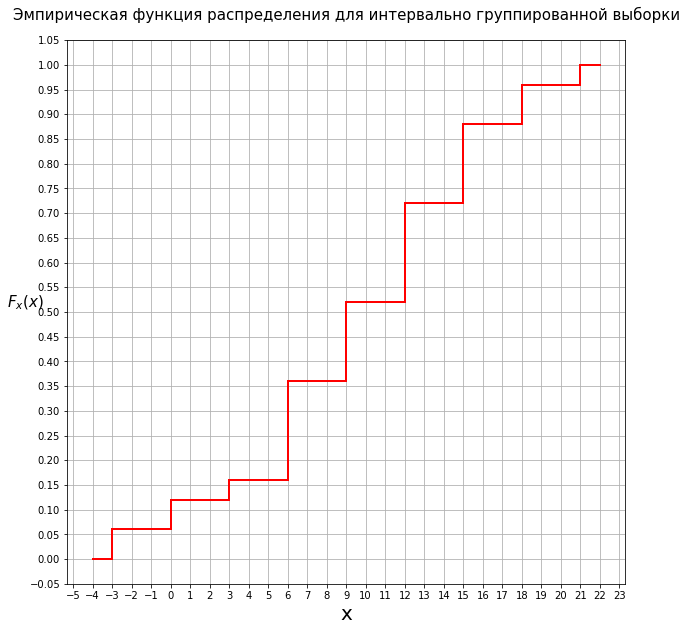

In [340]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

# нахождение накопленной частоты
f = np.cumsum(ni) / n

# построение функции распределения влево от нуля
h.pop(len(h) - 1)
ax.plot([h[0] - 1, h[0]], [0, 0], "r", linewidth=2)
ax.plot([h[0], h[0]], [0, f[0]], "r", linewidth=2)

# построение основной части функции распределения
for i in range(1, len(h)):
    ax.plot([h[i], h[i]], [f[i - 1], f[i]], "r", linewidth=2)
    ax.plot([h[i - 1], h[i]], [f[i - 1], f[i - 1]], "r", linewidth=2)

# построение функции распределения вправо от максимальной точки
ax.plot([h[len(h) - 1], 1 + h[len(h) - 1]], [f[len(h) - 1], f[len(h) - 1]], "r", linewidth=2,)

# параметры координатной плоскости
ax.set_xlabel("x", fontdict={"fontsize": 20})
ax.set_ylabel(r"$F_{x}(x)$", fontdict={"fontsize": 15}, rotation=0)
plt.title("Эмпирическая функция распределения для интервально группированной выборки", fontdict={"fontsize": 15}, pad=20)
plt.locator_params(axis="x", nbins=30)
plt.locator_params(axis="y", nbins=30)
plt.grid()
plt.show()

**Выборочные числовые характеристики негруппированной выборки**

<big>$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$</big>

<big>$D_x = \frac{1}{n}\sum_{i=1}^{n}(x_i-\overline{x})^2$</big>

<big>$\begin{equation}
    \tilde{h_x} =
    \begin{cases}
      x^{(l+1)}, & \text{если}\ n=2l+1 \\
      \frac{1}{2}(x^{(l)} + x^{(l+1)}), & \text{если}\ n = 2l
    \end{cases}
  \end{equation}$</big>

In [18]:
mx = 1 / n * sum(vyborka)
dx = 1 / n * sum([(vyborka[i] - mx) ** 2 for i in range(len(vyborka))])
hx = 1 / 2 * (sorted_vyborka[n // 2] + sorted_vyborka[n // 2 - 1]) if not n % 2  else 1 / 2 * sorted_vyborka[n // 2 - 1]

print("Размах:", max(vyborka) - min(vyborka))
print("Мода:", max(set(vyborka), key=vyborka.count))
print("Медиана:", hx)
print("Выборочное среднее:", mx)
print("Дисперсия:", dx)

Размах: 26.39
Мода: 15.29
Медиана: 11.754999999999999
Выборочное среднее: 10.884200000000003
Дисперсия: 37.09664836


In [19]:
print("Мода:", stat.mode(vyborka))
print("Медиана:", stat.median(vyborka))
print("Выборочное среднее:", stat.mean(vyborka))
print("Дисперсия:", stat.variance(vyborka))

Мода: 15.29
Медиана: 11.754999999999999
Выборочное среднее: 10.8842
Дисперсия: 37.85372281632653


**Выборочные числовые характеристики интервально группированной выборки**

<big>$\overline{x} = \frac{1}{n}\sum_{j=1}^{n}z_jn_j$</big>

<big>$D_x = \frac{1}{n}\sum_{j=1}^{n}(z_j-\overline{x})^2n_j$</big>

<big>$\tilde{d_x} = a_d + (\frac{n_d - n_{d-1}}{2n_d-n_{d-1}-n_{d+1}})Δ$</big>

<big>$\tilde{h_x} = a_h + (\frac{\frac{n}{2}-(n_1+n_2+ {...} +n_{h-1})}{n_h})Δ$</big>

In [344]:
mean = sum([mid[i] * ni[i] for i in range(len(mid))])/n

variance = sum([ni[i]*(mid[i] - mean)**2 for i in range(len(mid))])/n

mode1 = 6 + ((10-2)/(2*10-2-8))*3
mode2 = 12 + ((10-8)/(2*10-8-8))*3

median = 9 + ((n/2-(3+3+2+10))/(8))*3

print("Мода:", mode1, mode2)
print("Медиана:", median)
print("Выборочное среднее:", mean)
print("Дисперсия:", variance)

Мода: 8.4 13.5
Медиана: 11.625
Выборочное среднее: 11.16
Дисперсия: 36.1044
